In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [152]:
data = pd.read_csv('Data/Train.csv')

In [153]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [154]:
data.shape

(8523, 12)

In [155]:
# getting some information about thye dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [156]:
# checking for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Handling Missing Values

## Mean --> average

## Mode --> more repeated value

In [157]:
# save all data of data to update_data
update_data = data.copy(deep=True)

In [158]:
# add mean value to missing values in Item_Weight column
update_data['Item_Weight'].fillna(update_data['Item_Weight'].mean(), inplace=True)

In [159]:
# check Item_Weight column is any missing values
update_data['Item_Weight'].isnull().sum()

0

In [160]:
# add mode value to missing values in Outlet_Size column
update_data['Outlet_Size'].fillna(update_data['Outlet_Size'].mode()[0], inplace=True)

In [161]:
# check Outlet_Size column is any missing values
update_data['Outlet_Size'].isnull().sum()

0

In [162]:
# deep copy of update_data to update_data2
update_data2 = update_data.copy(deep=True)

In [163]:
update_data2.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [164]:
# save all data of update_data2 to new csv file name Update_Train.csv
update_data2.to_csv('Data/Update_Train.csv', index=False)

I:\Anaconda\envs\learn\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


<Figure size 1296x864 with 0 Axes>

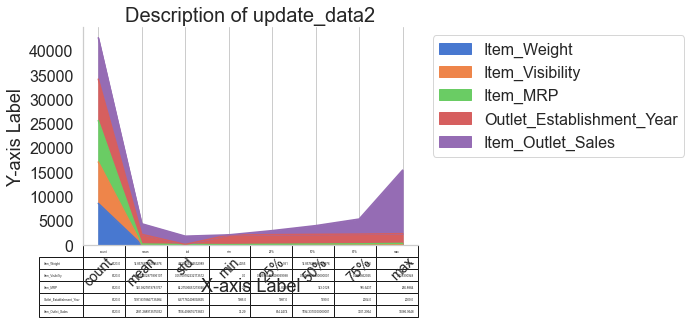

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the figure size
plt.figure(figsize=(18, 12))

# Set a custom color palette
colors = sns.color_palette("muted")

# Plot the area chart
ax = update_data2.describe().plot(kind='area', fontsize=16, table=True, color=colors)

# Customize the plot
ax.set_ylabel('Y-axis Label', fontsize=18)
ax.set_title('Description of update_data2', fontsize=20)

# Rotate x-labels
plt.xticks(rotation=45, fontsize=14)

# Move the legend outside the graph
ax.legend(fontsize=16, bbox_to_anchor=(1.02, 1), loc='upper left')

# Remove top and right spines
sns.despine()

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move x-axis label below the graph
ax.set_xlabel('X-axis Label', fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.15)

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


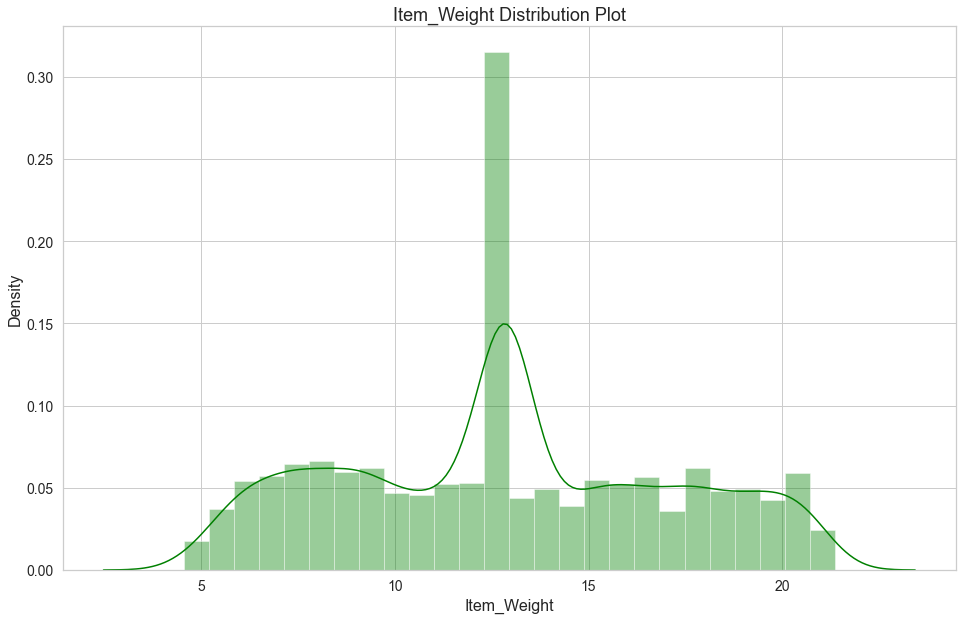

In [166]:
# Item_Wight distribution plot
plt.figure(figsize=(16, 10))
sns.distplot(update_data2['Item_Weight'], color='green')
plt.title('Item_Weight Distribution Plot', fontsize=18)
plt.xlabel('Item_Weight', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


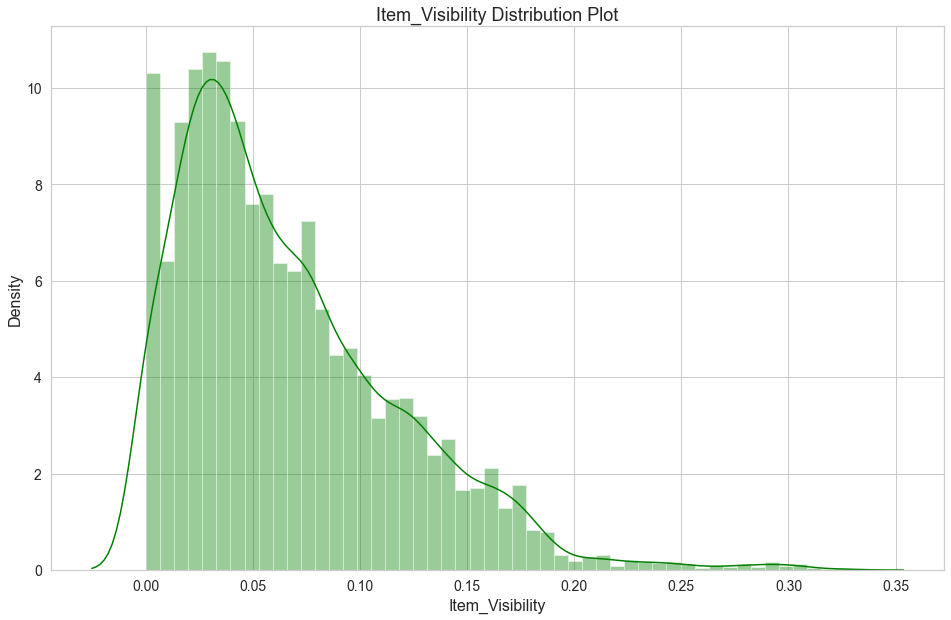

In [167]:
# Item_Visibility distribution plot
plt.figure(figsize=(16, 10))
sns.distplot(update_data2['Item_Visibility'], color='green')
plt.title('Item_Visibility Distribution Plot', fontsize=18)
plt.xlabel('Item_Visibility', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


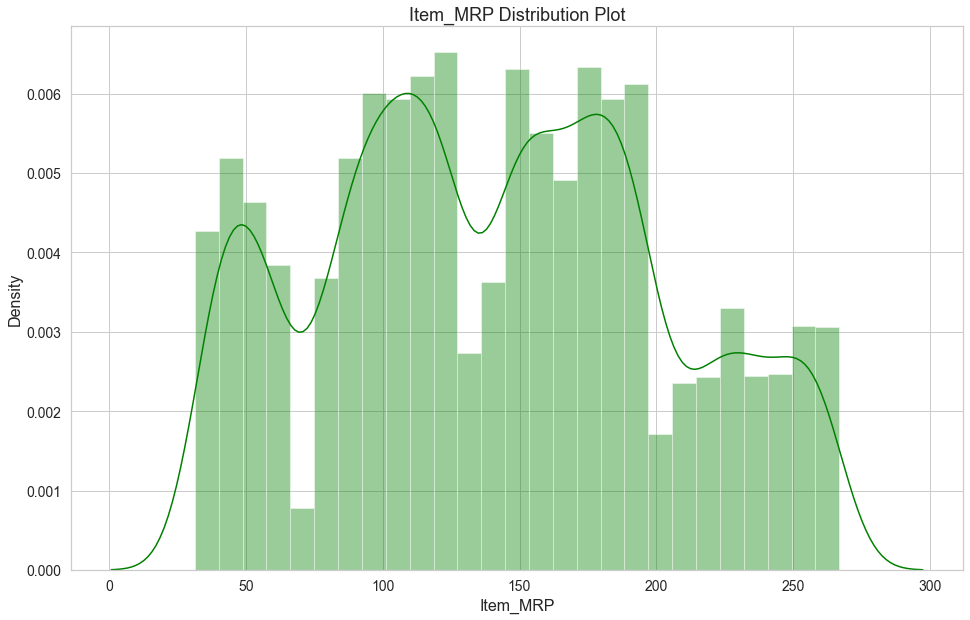

In [168]:
# Item_MRP distribution plot
plt.figure(figsize=(16, 10))
sns.distplot(update_data2['Item_MRP'], color='green')
plt.title('Item_MRP Distribution Plot', fontsize=18)
plt.xlabel('Item_MRP', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


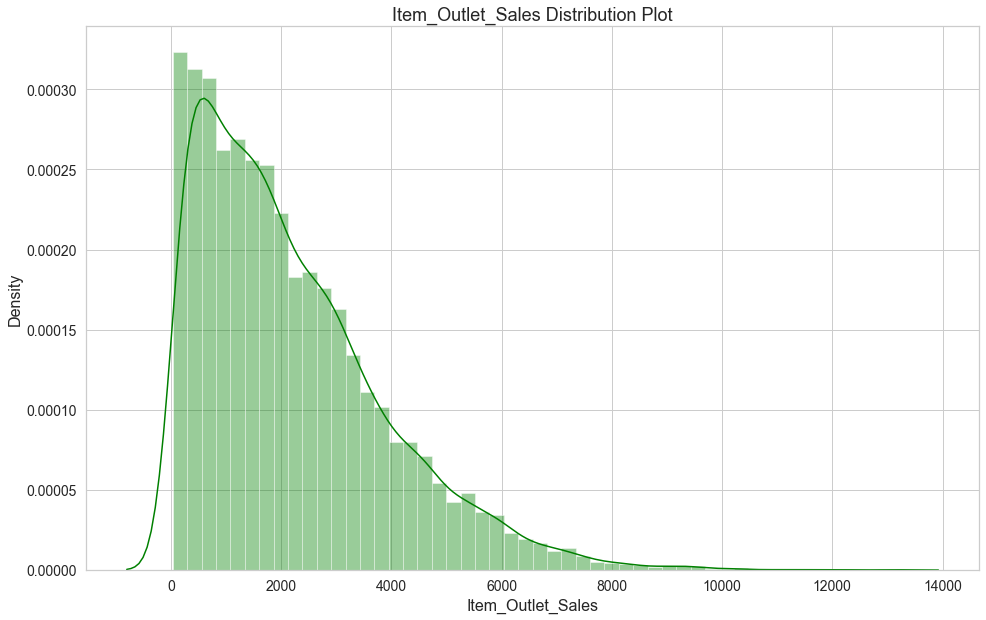

In [169]:
# Item_Outlet_Sales distribution plot
plt.figure(figsize=(16, 10))
sns.distplot(update_data2['Item_Outlet_Sales'], color='green')
plt.title('Item_Outlet_Sales Distribution Plot', fontsize=18)
plt.xlabel('Item_Outlet_Sales', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

I:\Anaconda\envs\learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


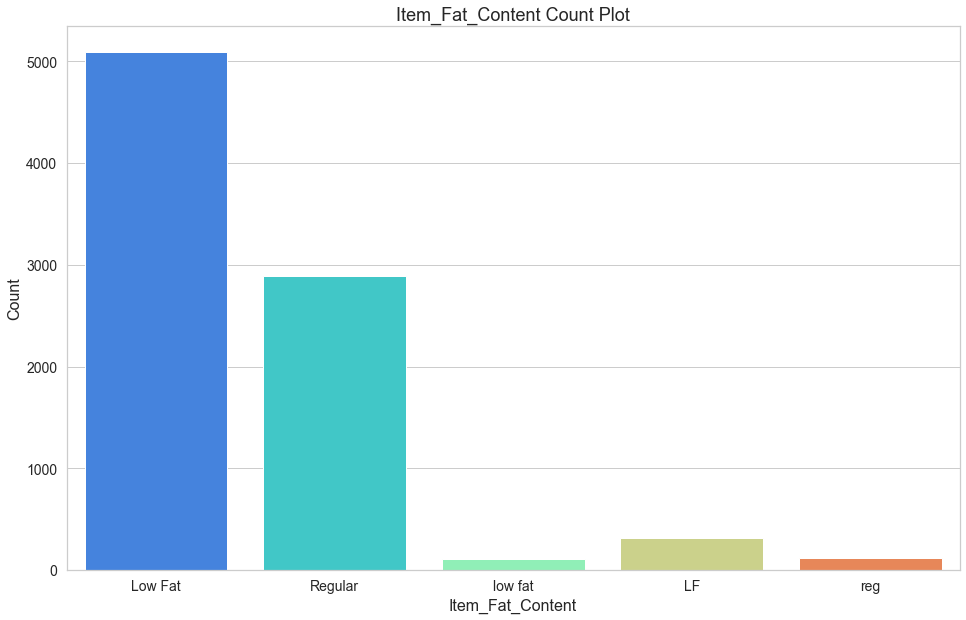

In [170]:
# Item_Fat_Content count plot
plt.figure(figsize=(16, 10))
sns.countplot(update_data2['Item_Fat_Content'], palette='rainbow')
plt.title('Item_Fat_Content Count Plot', fontsize=18)
plt.xlabel('Item_Fat_Content', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

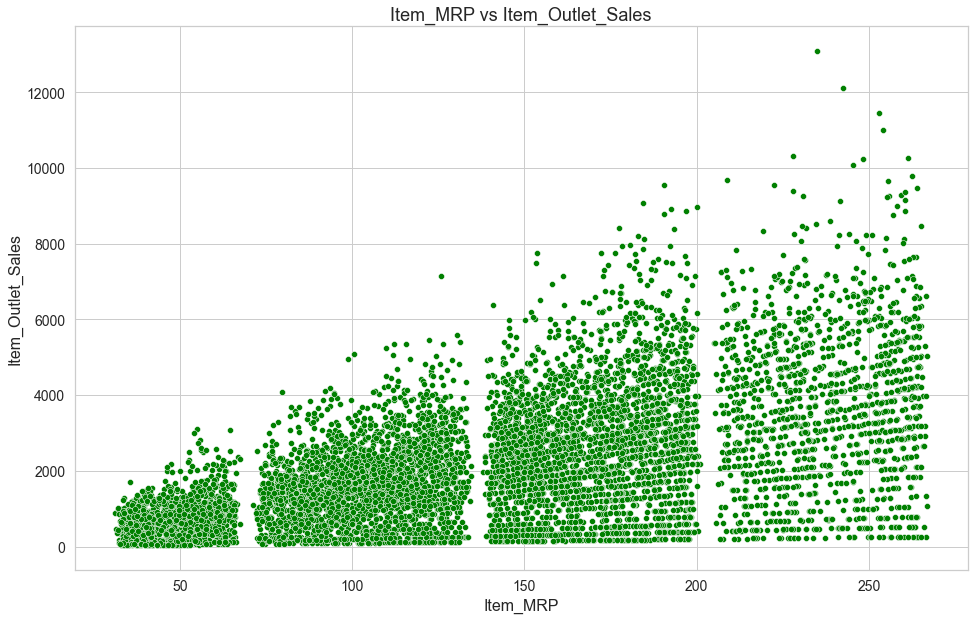

In [171]:
# show graph for Item_MRP and Item_Outlet_Sales
plt.figure(figsize=(16, 10))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=update_data2, color='green')
plt.title('Item_MRP vs Item_Outlet_Sales', fontsize=18)
plt.xlabel('Item_MRP', fontsize=16)
plt.ylabel('Item_Outlet_Sales', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

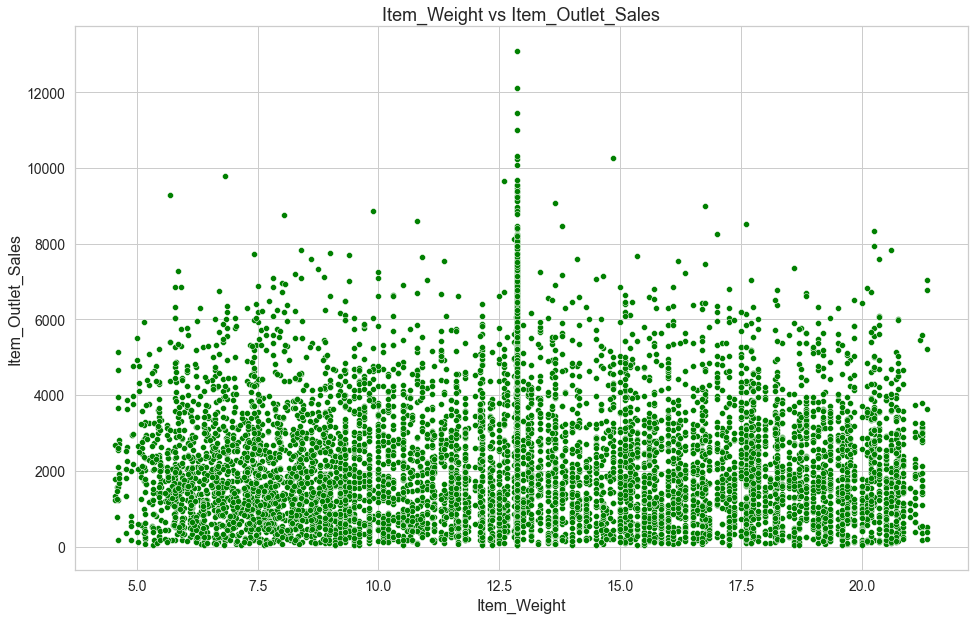

In [172]:
# show graph for Item_Weight and Item_Outlet_Sales
plt.figure(figsize=(16, 10))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=update_data2, color='green')
plt.title('Item_Weight vs Item_Outlet_Sales', fontsize=18)
plt.xlabel('Item_Weight', fontsize=16)
plt.ylabel('Item_Outlet_Sales', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

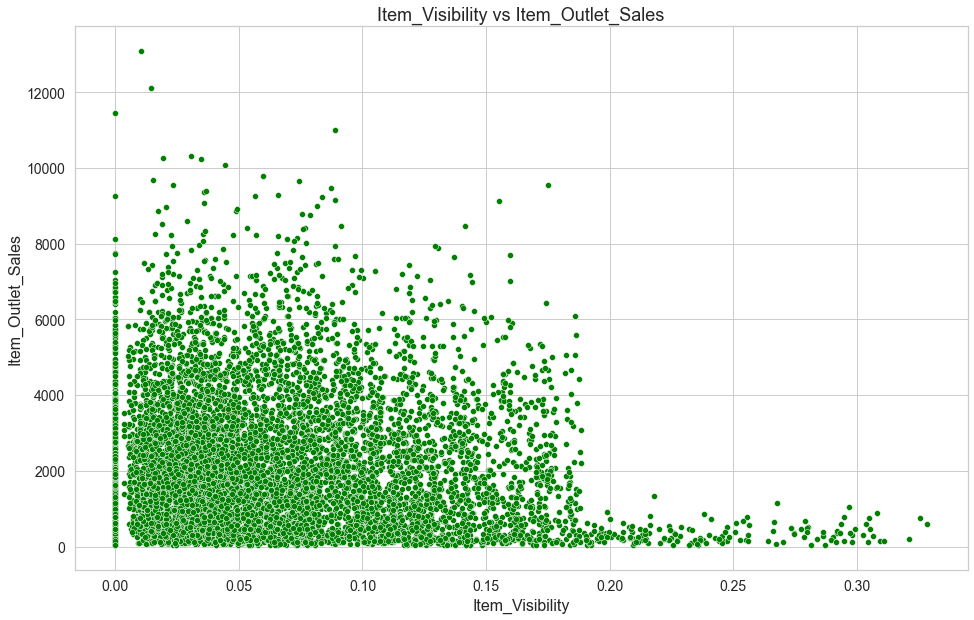

In [173]:
# show graph for Item_Visibility and Item_Outlet_Sales
plt.figure(figsize=(16, 10))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=update_data2, color='green')
plt.title('Item_Visibility vs Item_Outlet_Sales', fontsize=18)
plt.xlabel('Item_Visibility', fontsize=16)
plt.ylabel('Item_Outlet_Sales', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

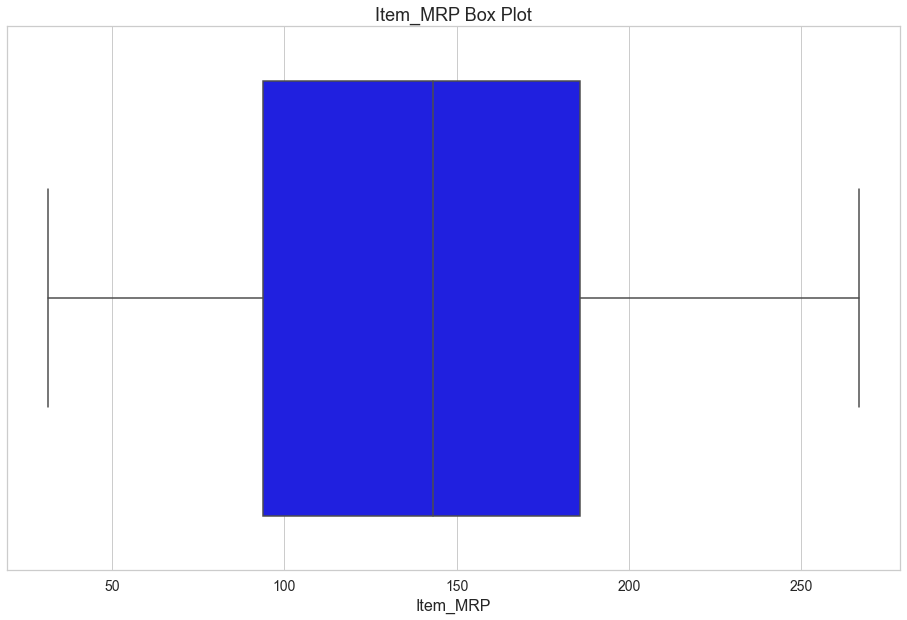

In [174]:
# show graph on Item_MRP
plt.figure(figsize=(16, 10))
sns.boxplot(x='Item_MRP', data=update_data2, color='blue')
plt.title('Item_MRP Box Plot', fontsize=18)
plt.xlabel('Item_MRP', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

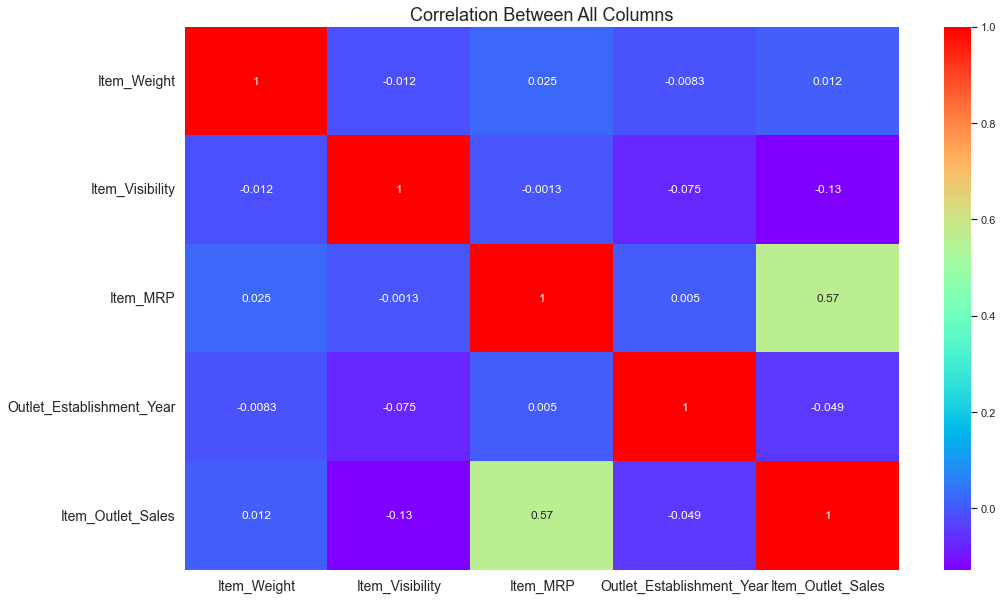

In [175]:
# check correlation between all columns
plt.figure(figsize=(16, 10))
sns.heatmap(update_data2.corr(), annot=True, cmap='rainbow')
plt.title('Correlation Between All Columns', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [176]:
# check skewness of all columns
update_data2.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

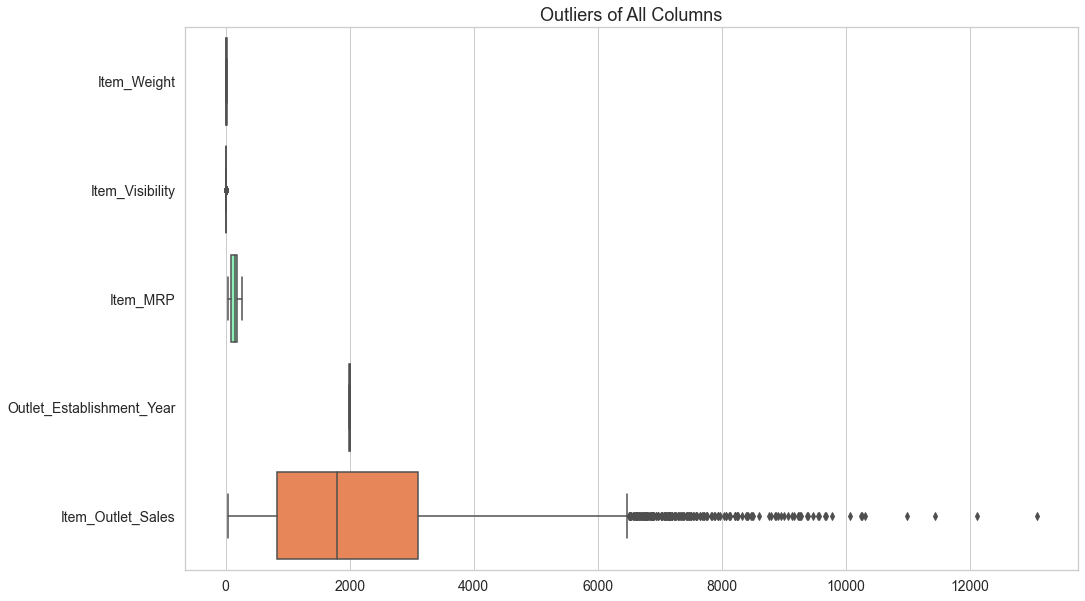

In [177]:
# check outliers of all columns
plt.figure(figsize=(16, 10))
sns.boxplot(data=update_data2, orient='h', palette='rainbow')
plt.title('Outliers of All Columns', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

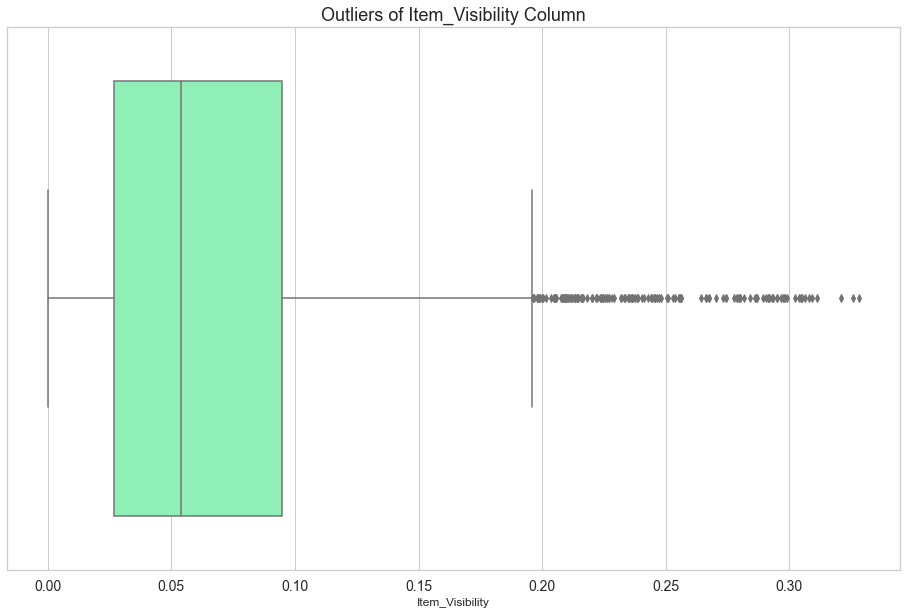

In [178]:
# check outliers of Item_Visibility column
plt.figure(figsize=(16, 10))
sns.boxplot(x='Item_Visibility', data=update_data2, palette='rainbow')
plt.title('Outliers of Item_Visibility Column', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

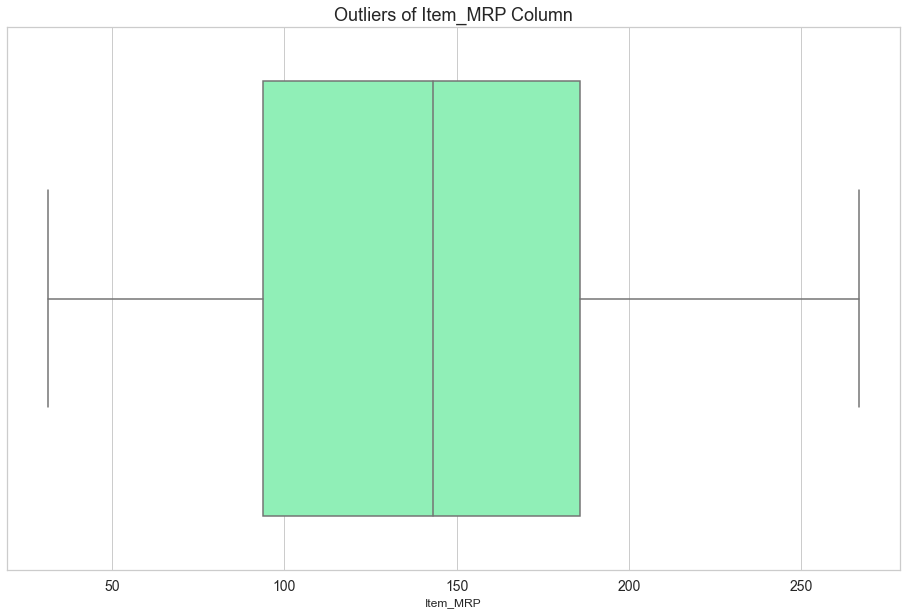

In [179]:
# check outliers of Item_MRP column
plt.figure(figsize=(16, 10))
sns.boxplot(x='Item_MRP', data=update_data2, palette='rainbow')
plt.title('Outliers of Item_MRP Column', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

I:\Anaconda\envs\learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
I:\Anaconda\envs\learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
I:\Anaconda\envs\learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
I:\Anaconda\envs\learn\lib\site-packages

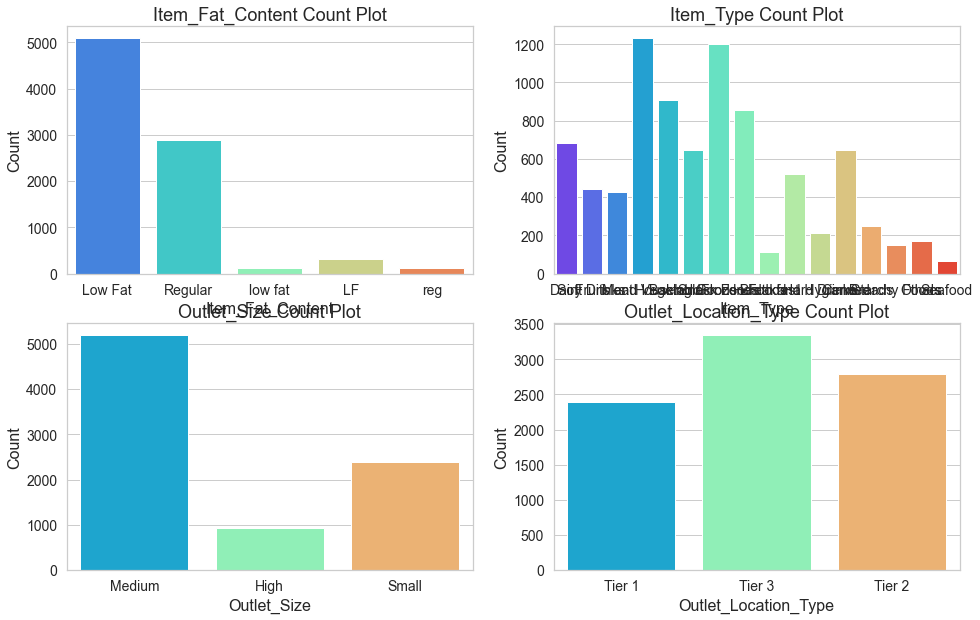

In [180]:
# plot graph for Categorical Features
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.countplot(update_data2['Item_Fat_Content'], palette='rainbow')
plt.title('Item_Fat_Content Count Plot', fontsize=18)
plt.xlabel('Item_Fat_Content', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(2, 2, 2)
sns.countplot(update_data2['Item_Type'], palette='rainbow')
plt.title('Item_Type Count Plot', fontsize=18)
plt.xlabel('Item_Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(2, 2, 3)
sns.countplot(update_data2['Outlet_Size'], palette='rainbow')
plt.title('Outlet_Size Count Plot', fontsize=18)
plt.xlabel('Outlet_Size', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(2, 2, 4)
sns.countplot(update_data2['Outlet_Location_Type'], palette='rainbow')
plt.title('Outlet_Location_Type Count Plot', fontsize=18)
plt.xlabel('Outlet_Location_Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sales_disperation(data, feature, target, hue=None, size=2):
    plt.figure(figsize=(10, 10))
    sns.set(style='whitegrid')
    sns.set_palette(sns.color_palette('Set2', 10))

    if hue is None:
        sns.countplot(x=feature, data=data, order=data[feature].unique())
        plt.title('{} Count Plot'.format(feature), fontsize=18)
        plt.xlabel('{}'.format(feature), fontsize=16)
        plt.ylabel('{}'.format(target), fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
    else:
        sns.countplot(x=feature, data=data, hue=hue, order=data[feature].unique())
        plt.title('{} Count Plot'.format(feature), fontsize=18)
        plt.xlabel('{}'.format(feature), fontsize=16)
        plt.ylabel('{}'.format(target), fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

    plt.show()

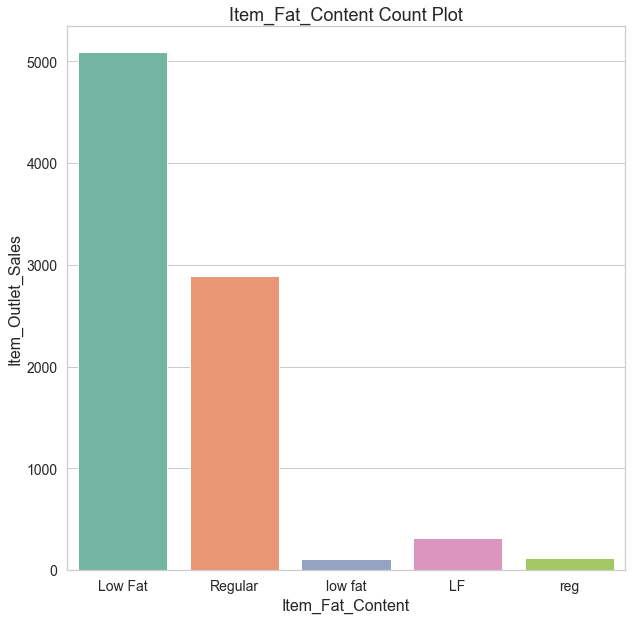

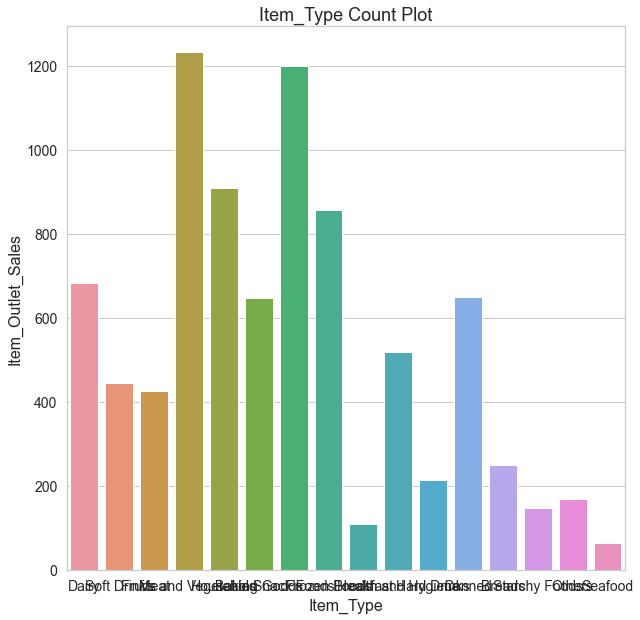

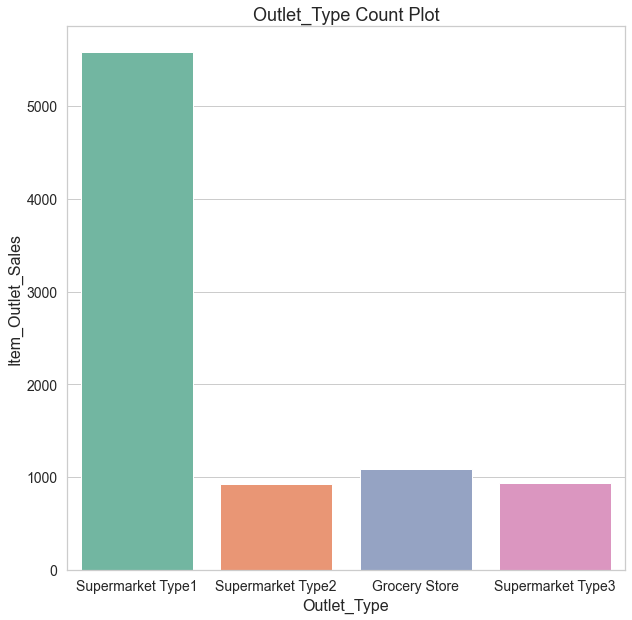

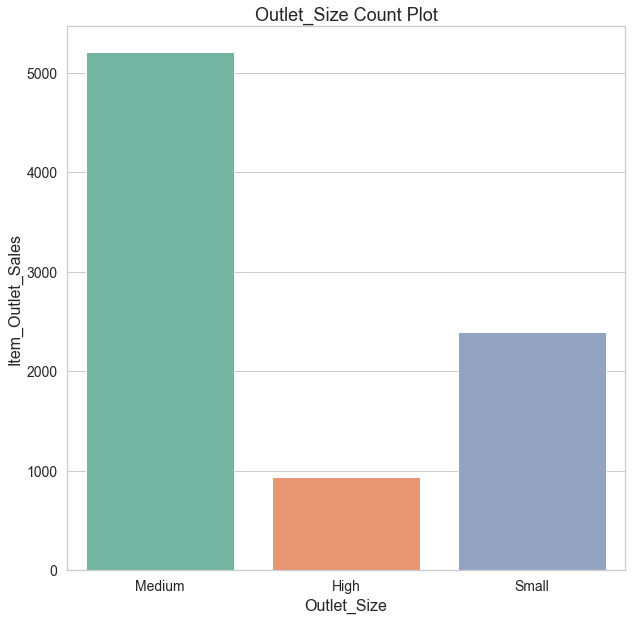

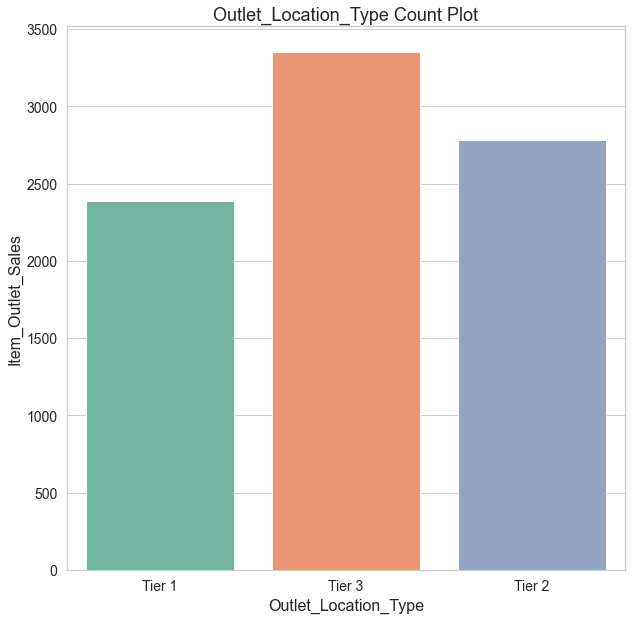

In [182]:
plot_sales_disperation(update_data2, 'Item_Fat_Content', 'Item_Outlet_Sales')
plot_sales_disperation(update_data2, 'Item_Type', 'Item_Outlet_Sales')
plot_sales_disperation(update_data2, 'Outlet_Type', 'Item_Outlet_Sales')
plot_sales_disperation(update_data2, 'Outlet_Size', 'Item_Outlet_Sales')
plot_sales_disperation(update_data2, 'Outlet_Location_Type', 'Item_Outlet_Sales')

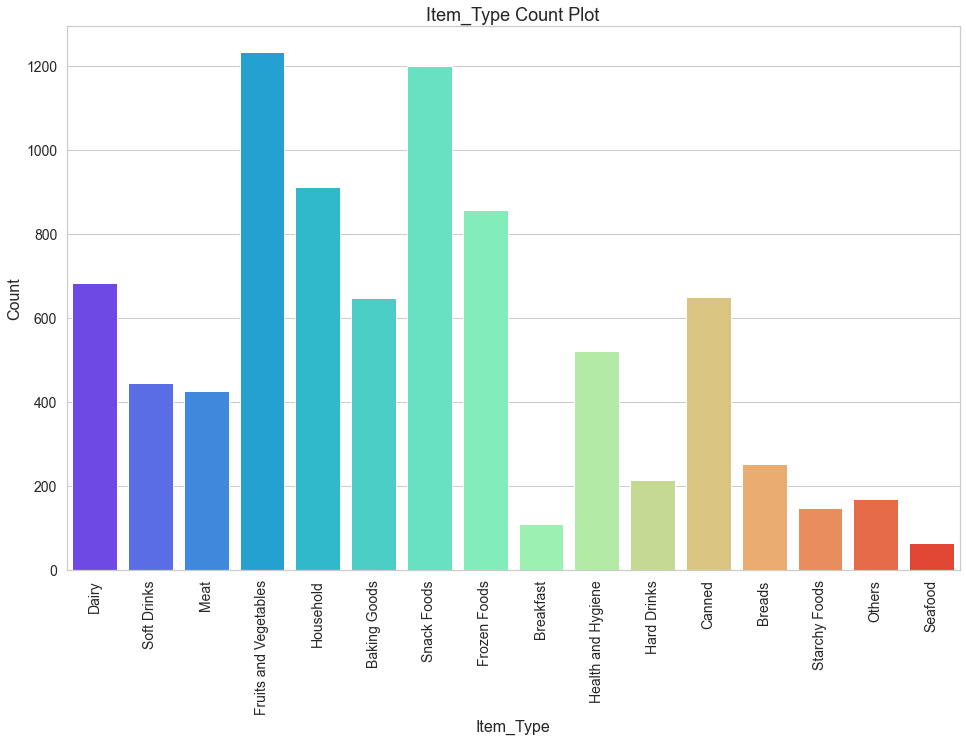

In [183]:
# plot graph on Item_Type column
plt.figure(figsize=(16, 10))
sns.countplot(x='Item_Type', data=update_data2, palette='rainbow')
plt.title('Item_Type Count Plot', fontsize=18)
plt.xlabel('Item_Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

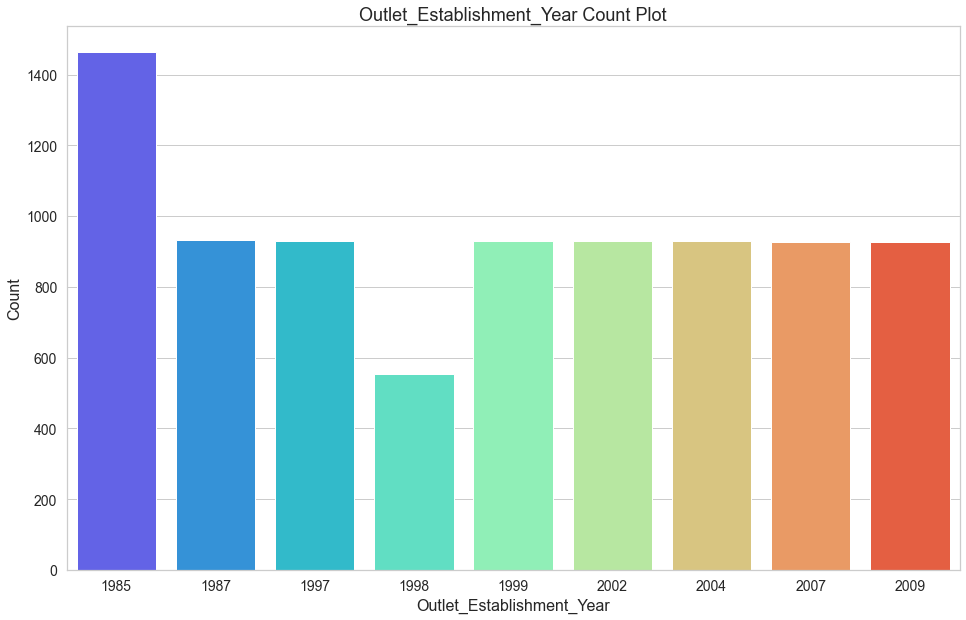

In [184]:
# show graph for outlet establishment year
plt.figure(figsize=(16, 10))
sns.countplot(x='Outlet_Establishment_Year', data=update_data2, palette='rainbow')
plt.title('Outlet_Establishment_Year Count Plot', fontsize=18)
plt.xlabel('Outlet_Establishment_Year', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [185]:
# show all object columns as list
update_data2.select_dtypes(include='object').columns.tolist()

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [186]:
update_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [187]:
# convert Outlet_Size column into numeric column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
update_data2['Outlet_Size'] = le.fit_transform(update_data2['Outlet_Size'])

In [188]:
# show all object columns as list
update_data2.select_dtypes(include='object').columns.tolist()

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type']

In [189]:
# convert Outlet_Location_Type column into numeric column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
update_data2['Outlet_Location_Type'] = le.fit_transform(update_data2['Outlet_Location_Type'])

In [190]:
# show all object columns as list
update_data2.select_dtypes(include='object').columns.tolist()

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Type']

In [191]:
update_data2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052


In [192]:
from sklearn.model_selection import train_test_split

# load the updated_data2 into train test split
X = update_data2.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis=1)
y = update_data2['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=10)

In [193]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5470,16.000000,Regular,0.065329,Dairy,78.4986,2009,1,2,Supermarket Type2
8431,19.700000,Low Fat,0.053331,Fruits and Vegetables,56.7930,2002,1,1,Supermarket Type1
3557,7.655000,Low Fat,0.032010,Canned,117.2492,2002,1,1,Supermarket Type1
7918,15.200000,Low Fat,0.033651,Household,108.9912,1999,1,0,Supermarket Type1
4573,12.300000,Regular,0.058106,Snack Foods,60.4562,2004,2,1,Supermarket Type1
...,...,...,...,...,...,...,...,...,...
4829,12.857645,Low Fat,0.035863,Meat,58.3562,1985,1,2,Supermarket Type3
7291,7.520000,Regular,0.044023,Baking Goods,183.0950,1997,2,0,Supermarket Type1
1344,12.850000,Low Fat,0.033173,Snack Foods,172.0422,2004,2,1,Supermarket Type1
7293,13.800000,Regular,0.024660,Canned,87.4172,1998,1,2,Grocery Store


In [194]:
y_train

5470    1791.6678
8431     848.8950
3557    2432.8332
7918    1965.4416
4573    1777.6860
          ...    
4829    1125.8678
7291    5492.8500
1344    5345.7082
7293     178.4344
1289    1065.2800
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [195]:
# model training using LinearRegression
import pandas as pd
from sklearn.linear_model import LinearRegression

# Perform one-hot encoding on the categorical variables
X_train_encoded = pd.get_dummies(X_train)

# Create an instance of LinearRegression
lr = LinearRegression()

# Fit the model with the encoded training data
lr.fit(X_train_encoded, y_train)

LinearRegression()

In [196]:
# predict the model's output on test data
import pandas as pd

# Perform one-hot encoding on the categorical variables in the test dataset
X_test_encoded = pd.get_dummies(X_test)

# Ensure that the columns in the test dataset match the columns in the encoded training dataset
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0
X_test_encoded = X_test_encoded[X_train_encoded.columns]

# Make predictions using the trained LinearRegression model
y_pred = lr.predict(X_test_encoded)
print(y_pred)

[4121.35013083 1761.63262744 3069.38653696 ... 1176.10187002 3030.64224946
 3150.686457  ]


In [197]:
# predict the model's output on train data
import pandas as pd
from sklearn.linear_model import LinearRegression

# Perform one-hot encoding on the categorical variables in the training dataset
X_train_encoded = pd.get_dummies(X_train)

# Create an instance of LinearRegression
lr = LinearRegression()

# Fit the model with the encoded training data
lr.fit(X_train_encoded, y_train)

# Perform one-hot encoding on the categorical variables in the test dataset
X_test_encoded = pd.get_dummies(X_test)

# Ensure that the columns in the test dataset match the columns in the encoded training dataset
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0
X_test_encoded = X_test_encoded[X_train_encoded.columns]

# Make predictions on the training data using the trained LinearRegression model
y_pred_train = lr.predict(X_train_encoded)
print(y_pred_train)

[1030.43776767 1059.87371688 1989.53412198 ... 2825.87010543 -394.07765889
 1695.55013089]


In [198]:
from sklearn.metrics import r2_score
# R squared Value
import scipy.stats as stats
r2_score(y_test, y_pred)

0.5726007627081857

In [200]:
# add randomized search for this dataset
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

In [201]:
# Create XGBoost object
xgb_params = {'eta': 0.005, 'seed': 10, 'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'max_depth': 5}
xgb_model = xgb.XGBRegressor(**xgb_params)

In [202]:
# Create the parameter grid
params = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': np.arange(0.005, 0.31, 0.005),
    'subsample': np.arange(0.3, 1.0, 0.05),
    'colsample_bytree': np.arange(0.3, 1.0, 0.05),
    'n_estimators': [100, 500, 1000, 1500, 2000]
}

In [203]:
# Perform random search
random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=5, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=3, random_state=10)
random_search.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, eta=0.005,
                                          eval_metric='rmse', gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=5,
                                          min_child_weight=None, missing=nan,
                                          monotone_constrain...
       0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225,
       0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265, 0.27 ,
       0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0

In [204]:
# Print the best parameters
print(random_search.best_params_)

{'subsample': 0.5499999999999999, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.14, 'colsample_bytree': 0.7999999999999998}


In [205]:
# Print the best score
print(random_search.best_score_)

-2125191.540659013


In [206]:
# Print the best estimator
print(random_search.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7999999999999998, eta=0.005,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.14, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=16,
             num_parallel_tree=1, random_state=10, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=10, subsample=0.5499999999999999,
             tree_method='exact', validate_parameters=1, verbosity=None)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7999999999999998, eta=0.005,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.14, max_delta_step=0,
             max_depth=5, min_child_wei

In [207]:
# Make predictions on the test set using the best estimator
y_pred = random_search.best_estimator_.predict(X_test_encoded)

No handles with labels found to put in legend.


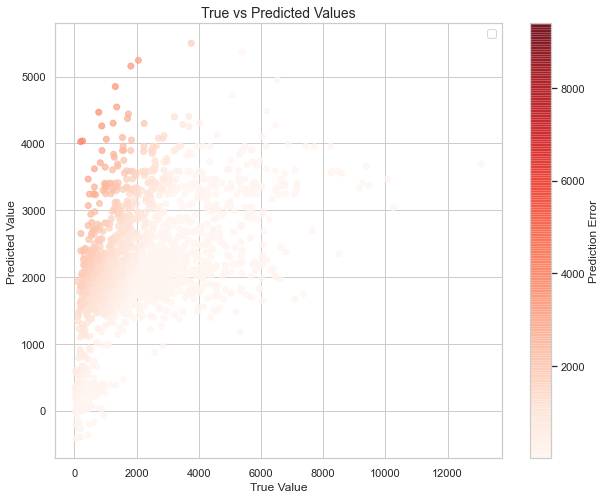

In [211]:
# Plot the predictions
fig, ax = plt.subplots(figsize=(10, 8))
# Set labels and title
plt.xlabel('True Value', fontsize=12)
plt.ylabel('Predicted Value', fontsize=12)
plt.title('True vs Predicted Values', fontsize=14)
# Add color gradient based on prediction error
error = y_pred - y_test
c = np.abs(error)
norm = plt.Normalize(vmin=c.min(), vmax=c.max())
cmap = plt.cm.Reds
plt.scatter(y_test, y_pred, c=error, cmap=cmap, norm=norm, alpha=0.7)
# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Prediction Error', fontsize=12)
# Add legend
plt.legend()
# Show the plot
plt.show()

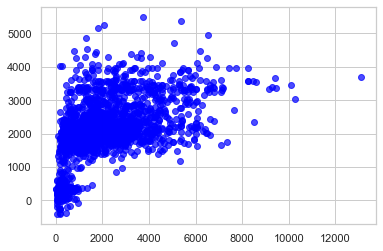

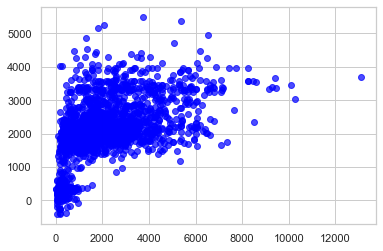

In [209]:
# Scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predictions')

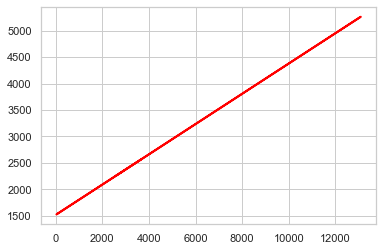

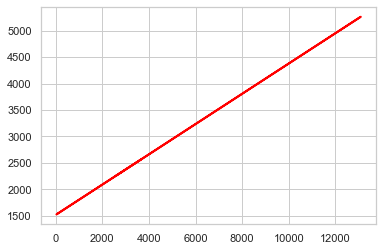

In [210]:
# Add a trendline

z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red', linewidth=2, label='Trendline')

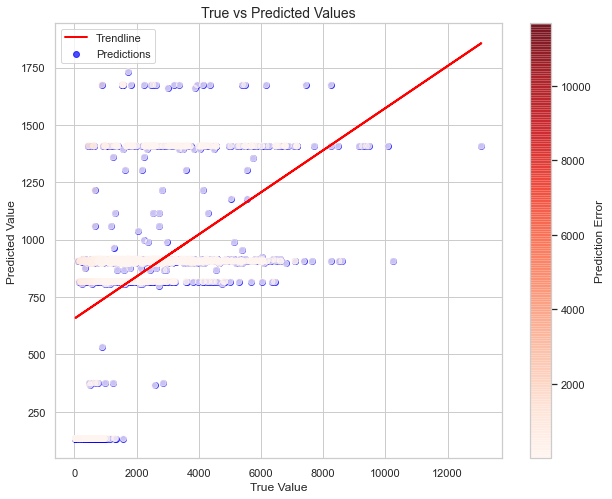

In [212]:
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables in X_train and X_test
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Create XGBoost object
xgb_params = {'eta': 0.005, 'seed': 10, 'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'max_depth': 5}
xgb_model = xgb.XGBRegressor(**xgb_params)

# Fit the model to the encoded training data
xgb_model.fit(X_train_encoded, y_train)

# Make predictions for the test data
y_pred = xgb_model.predict(X_test_encoded)

# Plot the predictions
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predictions')

# Add a trendline
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red', linewidth=2, label='Trendline')

# Set labels and title
plt.xlabel('True Value', fontsize=12)
plt.ylabel('Predicted Value', fontsize=12)
plt.title('True vs Predicted Values', fontsize=14)

# Add color gradient based on prediction error
error = y_pred - y_test
c = np.abs(error)
norm = plt.Normalize(vmin=c.min(), vmax=c.max())
cmap = plt.cm.Reds
plt.scatter(y_test, y_pred, c=error, cmap=cmap, norm=norm, alpha=0.7)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Prediction Error', fontsize=12)

# Add legend
plt.legend()

# Show the plot
plt.show()